# Objective:
- Identify which customer segments are at highest risk of churn.
- Understand patterns in tenure, monthly charges, and services that predict retention.
- Provide actionable retention strategies.
- Optionally, generate cohort analysis to visualize retention over time.


In [14]:
import pandas as pd

data_segments = pd.read_csv(r"C:\Users\zoraw\Desktop\Agentic Customer Segmentatio\data_final_for_modeling.csv")

# Check first few rows
print(data_segments.head())

# Check all column names
print(data_segments.columns)


   customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity  ... TechSupport  \
0  No phone service             DSL             No  ...          No   
1                No             DSL            Yes  ...          No   
2                No             DSL            Yes  ...          No   
3  No phone service             DSL            Yes  ...         Yes   
4                No     Fiber optic             No  ...          No   

  StreamingTV StreamingMovies        Contract PaperlessBilling  \
0          No             

Churn value counts:
 Churn
0    5174
1    1869
Name: count, dtype: int64

Segment value counts:
 Segment_Label
Low Value Low Spend         2247
New High Spend (At Risk)    1989
Mid Value Stable            1538
High Value Loyal            1269
Name: count, dtype: int64


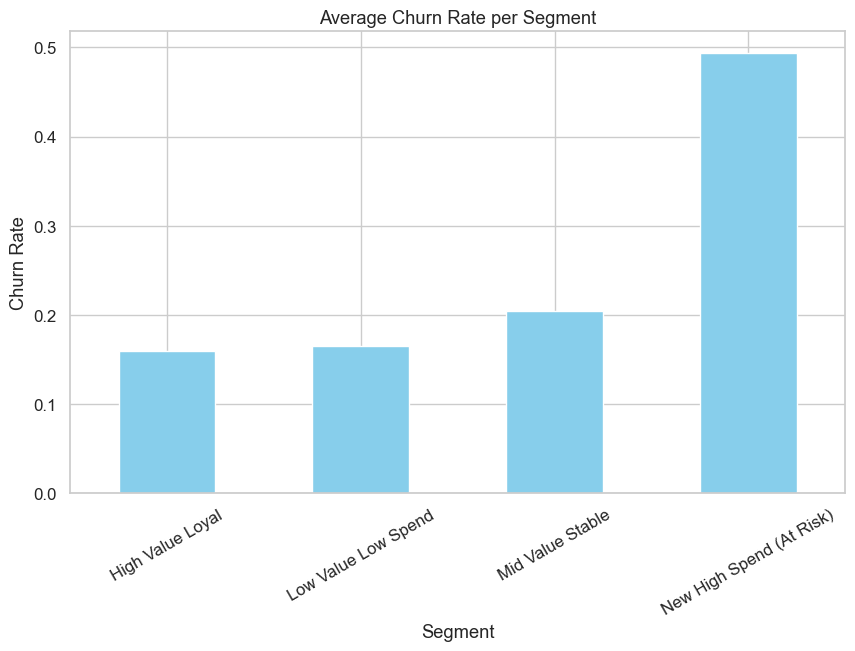

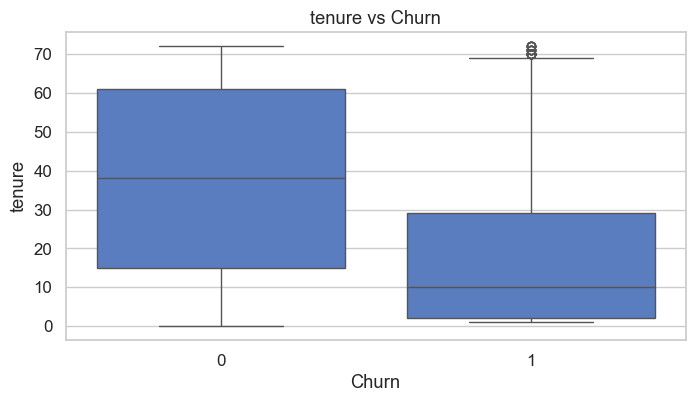

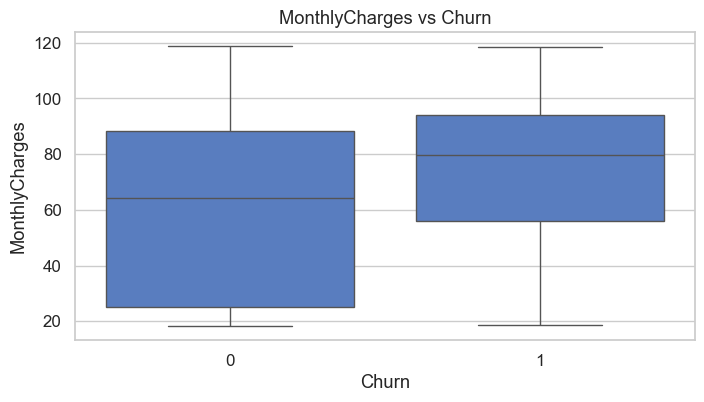

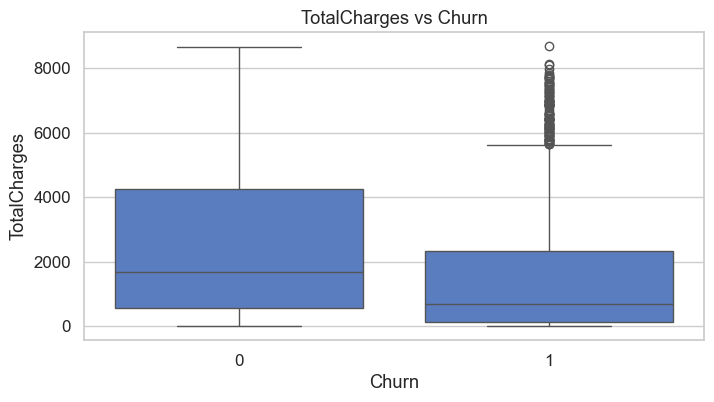

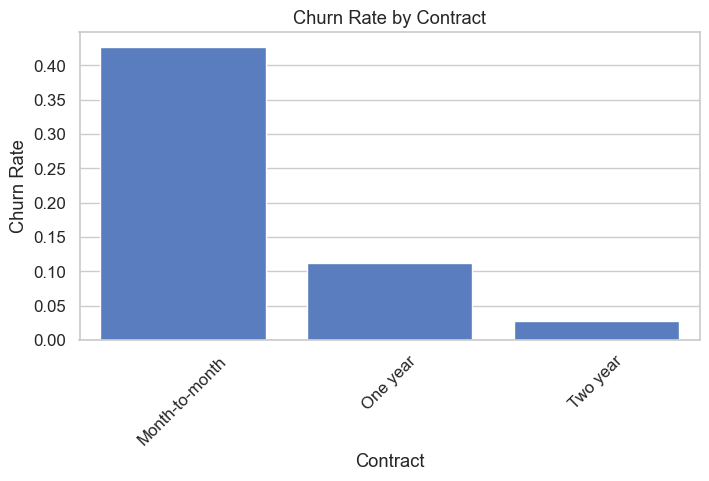

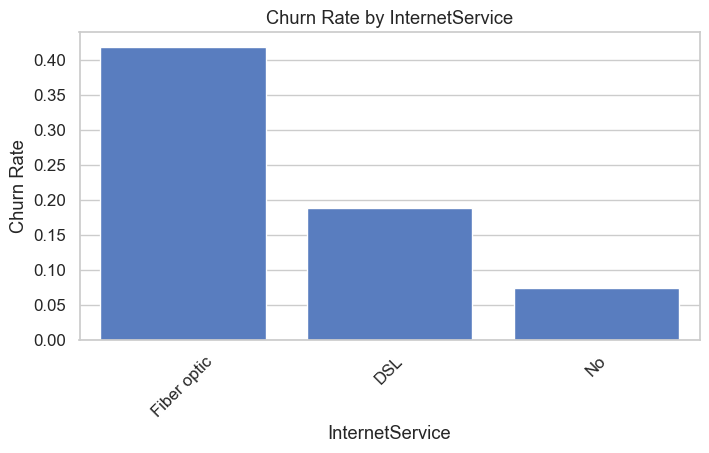

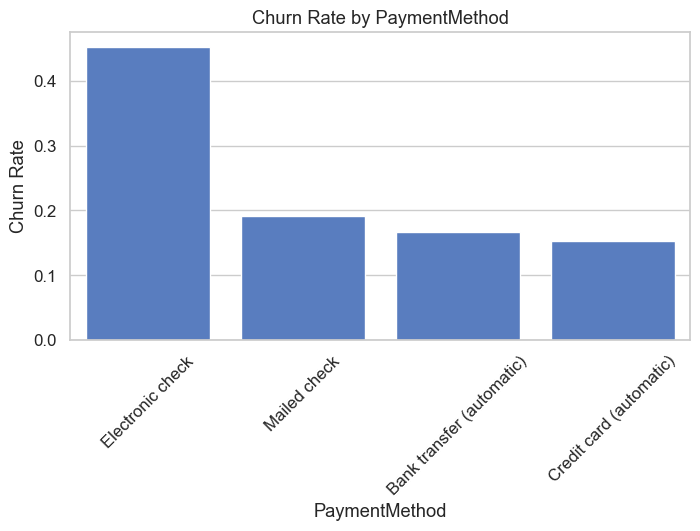

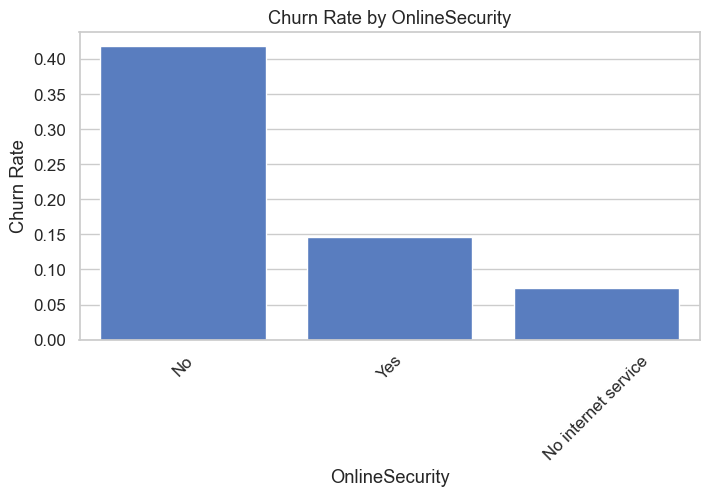

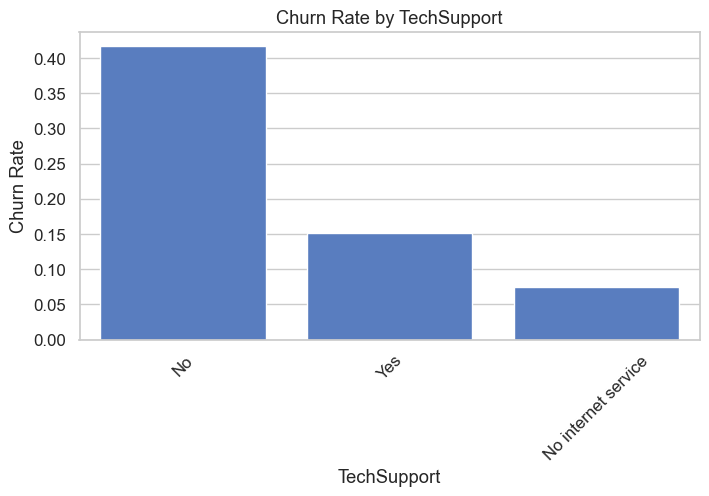

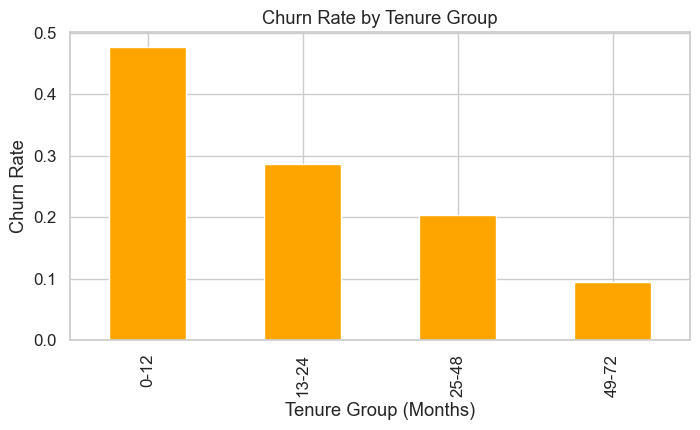

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid", palette="muted", font_scale=1.1)

# -------------------------------
# Step 1 – Load Data
# -------------------------------
data = pd.read_csv(r"C:\Users\zoraw\Desktop\Agentic Customer Segmentatio\data_final_for_modeling.csv")

# Ensure Churn is numeric
data['Churn'] = data['Churn'].map({'Yes': 1, 'No': 0})

print("Churn value counts:\n", data['Churn'].value_counts())
print("\nSegment value counts:\n", data['Segment_Label'].value_counts())

# -------------------------------
# Step 2 – Segment-Level Churn
# -------------------------------
segment_churn = data.groupby('Segment_Label')['Churn'].mean()

plt.figure(figsize=(10,6))
segment_churn.plot(kind='bar', color='skyblue')
plt.title("Average Churn Rate per Segment")
plt.ylabel("Churn Rate")
plt.xlabel("Segment")
plt.xticks(rotation=30)
plt.show()

# -------------------------------
# Step 3 – Numeric Feature Analysis
# -------------------------------
numeric_features = ['tenure', 'MonthlyCharges', 'TotalCharges']

for feature in numeric_features:
    plt.figure(figsize=(8,4))
    sns.boxplot(x='Churn', y=feature, data=data)
    plt.title(f'{feature} vs Churn')
    plt.show()

# -------------------------------
# Step 4 – Categorical Feature Analysis
# -------------------------------
categorical_features = ['Contract', 'InternetService', 'PaymentMethod', 'OnlineSecurity', 'TechSupport']

for feature in categorical_features:
    churn_rate = data.groupby(feature)['Churn'].mean().sort_values(ascending=False)
    plt.figure(figsize=(8,4))
    sns.barplot(x=churn_rate.index, y=churn_rate.values)
    plt.xticks(rotation=45)
    plt.ylabel("Churn Rate")
    plt.title(f"Churn Rate by {feature}")
    plt.show()

# -------------------------------
# Step 5 – Tenure / Cohort Analysis
# -------------------------------
data['tenure_group'] = pd.cut(data['tenure'], bins=[0,12,24,48,72], labels=['0-12','13-24','25-48','49-72'])
cohort_churn = data.groupby('tenure_group', observed=True)['Churn'].mean()

plt.figure(figsize=(8,4))
cohort_churn.plot(kind='bar', color='orange')
plt.title("Churn Rate by Tenure Group")
plt.ylabel("Churn Rate")
plt.xlabel("Tenure Group (Months)")
plt.show()


In [18]:
segment_summary = data.groupby('Segment_Label').agg(
    total_customers=('customerID', 'count'),
    avg_tenure=('tenure', 'mean'),
    avg_monthly_charges=('MonthlyCharges', 'mean'),
    churn_count=('Churn', 'sum'),
    churn_rate=('Churn', 'mean')
).reset_index()

print(segment_summary)


              Segment_Label  total_customers  avg_tenure  avg_monthly_charges  \
0          High Value Loyal             1269   62.979511            99.507565   
1       Low Value Low Spend             2247   25.502448            27.195906   
2          Mid Value Stable             1538   45.293238            76.734753   
3  New High Spend (At Risk)             1989   10.610357            75.773881   

   churn_count  churn_rate  
0          202    0.159180  
1          371    0.165109  
2          315    0.204811  
3          981    0.493213  


In [19]:
segment_summary.to_csv(r"C:\Users\zoraw\Desktop\Agentic Customer Segmentatio\segment_summary.csv", index=False)


In [20]:
for segment in data['Segment_Label'].unique():
    print(f"\nSegment: {segment}")
    subset = data[data['Segment_Label'] == segment]
    print(subset[numeric_features + ['Churn']].corr()['Churn'].sort_values(ascending=False))



Segment: Low Value Low Spend
Churn             1.000000
MonthlyCharges    0.305555
TotalCharges     -0.297420
tenure           -0.343839
Name: Churn, dtype: float64

Segment: Mid Value Stable
Churn             1.000000
MonthlyCharges    0.275422
TotalCharges     -0.181435
tenure           -0.321146
Name: Churn, dtype: float64

Segment: New High Spend (At Risk)
Churn             1.000000
MonthlyCharges    0.306665
TotalCharges     -0.250861
tenure           -0.335637
Name: Churn, dtype: float64

Segment: High Value Loyal
Churn             1.000000
MonthlyCharges    0.120327
TotalCharges     -0.149703
tenure           -0.266488
Name: Churn, dtype: float64


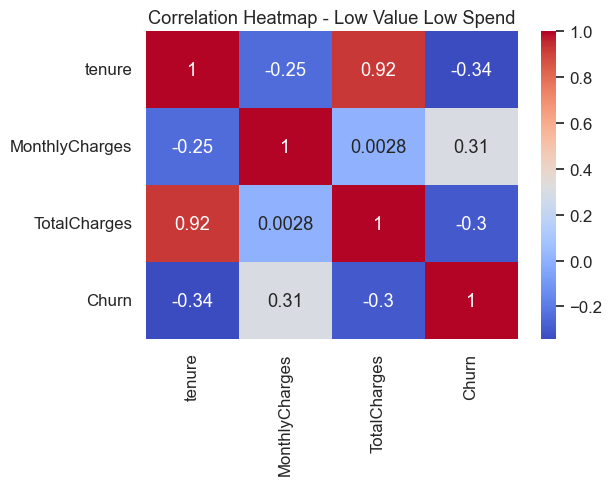

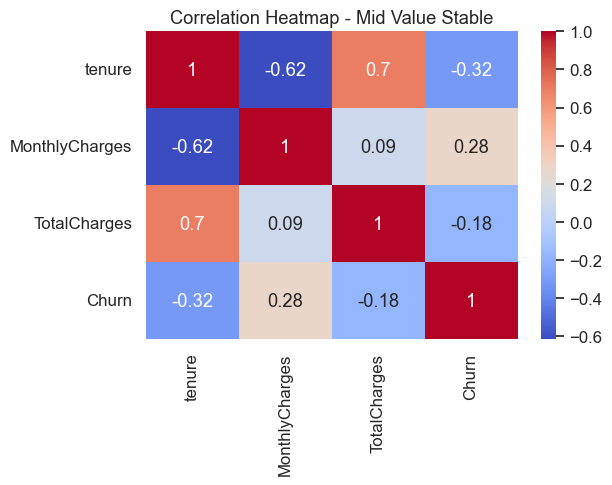

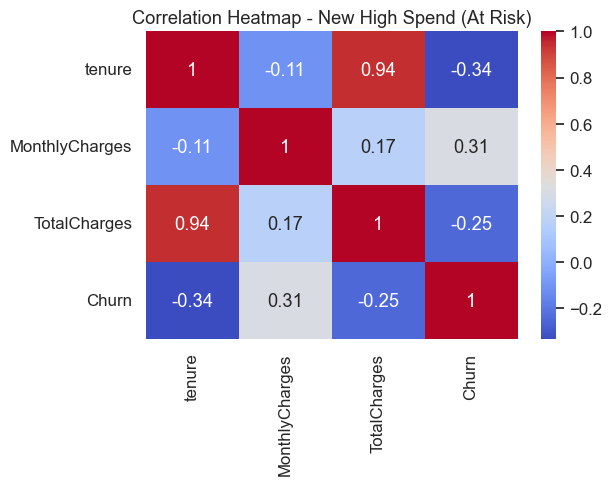

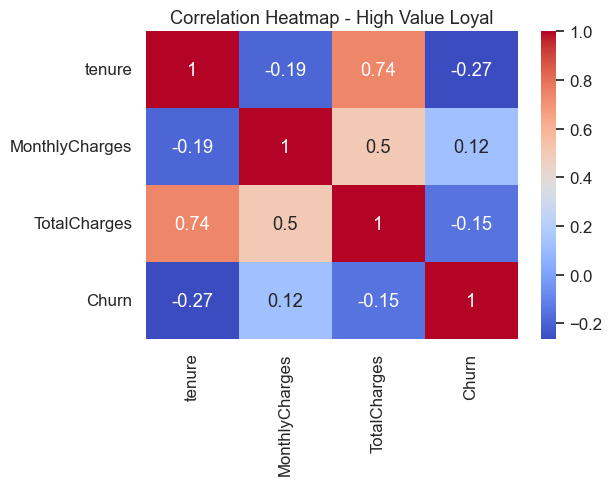

In [21]:
for segment in data['Segment_Label'].unique():
    subset = data[data['Segment_Label'] == segment]
    plt.figure(figsize=(6,4))
    sns.heatmap(subset[numeric_features + ['Churn']].corr(), annot=True, cmap='coolwarm')
    plt.title(f'Correlation Heatmap - {segment}')
    plt.show()
